In [19]:
<a href="https://colab.research.google.com/github/tvml/ml2324/blob/master/codici/class_regr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SyntaxError: invalid syntax (2984787925.py, line 1)

## Classification mediante regression

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 'xkcd:scarlet']
cmap_big = plt.colormaps["Spectral"].resampled(512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.5, 1, 128)))

In [23]:
import urllib.request

filepath = "../dataset/"
url = "https://tvml.github.io/ml2324/dataset/"

def get_file(filename):
    IS_COLAB = ('google.colab' in str(get_ipython()))
    if IS_COLAB:
        urllib.request.urlretrieve (url+filename, filename)
        return filename
    else:
        return filepath+filename

In [41]:
def statistics(Theta,X):
    y = np.asarray(classify(Theta,X)).reshape(1,-1)
    confmat = np.zeros((2, 2))
    for i in range(2):
        for j in range(2):
            confmat[i,j] = np.sum(np.where(y==i,1,0)*np.where(t==j,1,0))
    print('Veri negativi: {0:d}'.format(int(confmat[0,0])))
    print('Falsi negativi: {0:d}'.format(int(confmat[0,1])))
    print('Falsi positivi: {0:d}'.format(int(confmat[1,0])))
    print('Veri positivi: {0:d}'.format(int(confmat[1,1])))
    print('Precision insieme 1: {0:3.3f}'.format(round(confmat[1,1]/(confmat[1,1]+confmat[1,0]),2)))
    print('Recall insieme 1: {0:3.3f}'.format(round(confmat[1,1]/(confmat[1,1]+confmat[0,1]),2)))
    print( 'Precision insieme 2: {0:3.3f}'.format(round(confmat[0,0]/(confmat[0,0]+confmat[0,1]),2)))
    print( 'Recall insieme 2: {0:3.3f}'.format(round(confmat[0,0]/(confmat[0,0]+confmat[1,0]),2)))
    print( 'Accuracy: {0:3.3f}'.format(round(np.trace(confmat)/n,2)))
    return confmat

In [25]:
def classify(Theta, X):
    # determina i valori di regressione predetti per le due classi
    y = X*Theta
    # restituisce la classe con valore più elevato nella regressione
    return np.where(y[:,0]>y[:,1], 0, 1)

In [26]:
# legge i dati in dataframe pandas
data = pd.read_csv(get_file("esami.txt"), header=0, delimiter=',', names=['x1','x2','t'])

In [27]:
# calcola dimensione dei dati
n = len(data)

# calcola dimensionalità delle features
nfeatures = len(data.columns)-1

X = np.array(data[['x1','x2']])
t = np.array(data['t'])

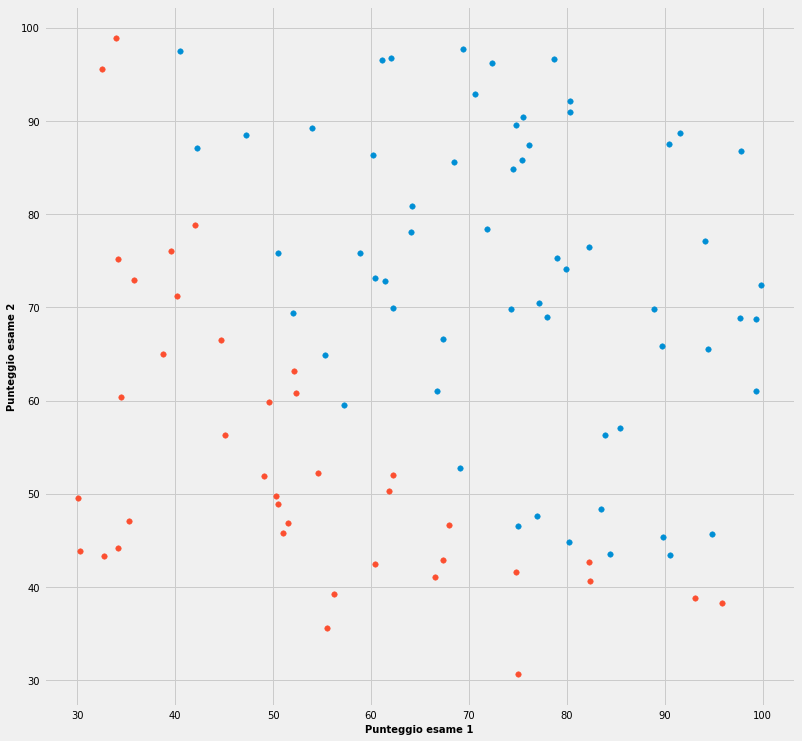

In [28]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
ax.scatter(np.asarray(X[t==0,0]), np.asarray(X[t==0,1]), s=30,c='C1', marker='o')
ax.scatter(np.asarray(X[t==1,0]), np.asarray(X[t==1,1]), s=30,c='C0', marker='o')
plt.xlabel('Punteggio esame 1', fontsize=10)
plt.ylabel('Punteggio esame 2', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [29]:
# aggiunge una colonna unitaria alla matrice delle features
X=np.column_stack((np.ones(n), X))

# determina la rappresentazione 1-su-k dei valori delle classi
t0 = np.where(t==0, 1, 0)
t1 = np.where(t==0, 0, 1)
T=np.column_stack((t0,t1))

# costruisce la rappresentazione come np.matrix delle matrici X e T
Tm=np.matrix(T)
Xm = np.matrix(X)

In [30]:
# calcola i coefficienti di regressione per le due classi, associati alle colonne di Theta
Theta=(Xm.T*Xm).I*Xm.T*Tm

In [31]:
## calcola i valori restituiti come classificazione su una griglia
delta1=max(X[:,1])-min(X[:,1])
delta2=max(X[:,2])-min(X[:,2])
min1=min(X[:,1])-delta1/10
max1=max(X[:,1])+delta1/10
min2=min(X[:,2])-delta2/10
max2=max(X[:,2])+delta2/10
u = np.linspace(min1, max1, 100)
v = np.linspace(min2, max2, 100)
z = np.zeros((len(u), len(v)))
y0 = np.zeros((len(u), len(v)))
y1 = np.zeros((len(u), len(v)))
for i in range(0, len(u)):
    for j in range(0, len(v)):
        r = np.matrix([1, u[i],v[j]])*Theta
        y0[i,j] = np.asarray(r)[0][0]
        y1[i,j] = np.asarray(r)[0][1]
        z[i,j] =np.where(r[:,0]>r[:,1], 0, 1)
u, v = np.meshgrid(u, v)

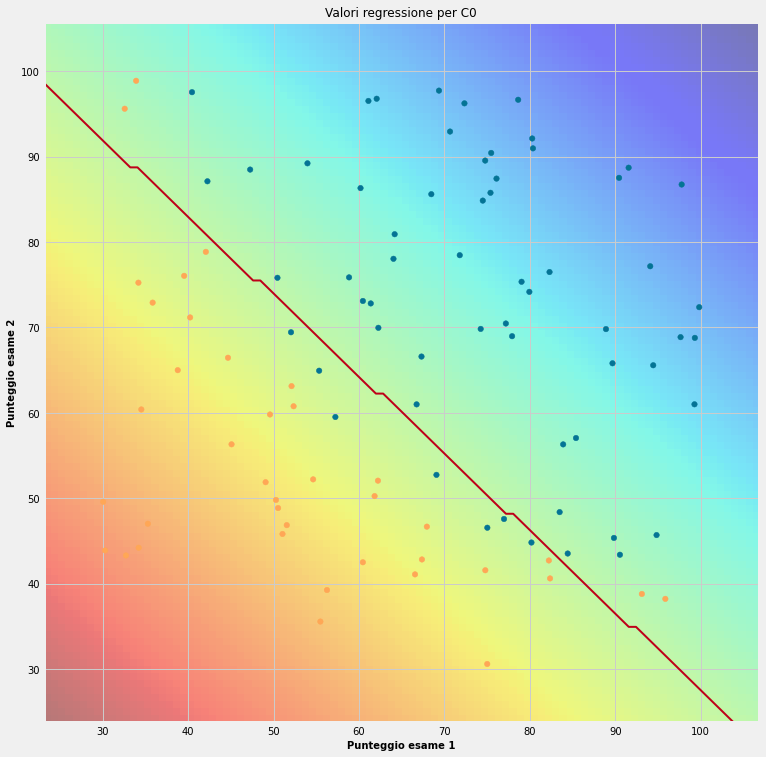

In [32]:
c = ([colors[i] for i in np.nditer(t)])
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
imshow_handle = plt.imshow(y0, origin='lower', extent=(min1, max1, min2, max2), alpha=.5)
ax.scatter(np.asarray(X[:,1]), np.asarray(X[:,2]), s=30,c=c, marker='o')
plt.contour(u, v, z, [0.5], colors=[colors[9]])
plt.xlabel('Punteggio esame 1', fontsize=10)
plt.ylabel('Punteggio esame 2', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(u.min(), u.max())
plt.ylim(v.min(), v.max())
plt.title('Valori regressione per C0', fontsize=12)
plt.show()

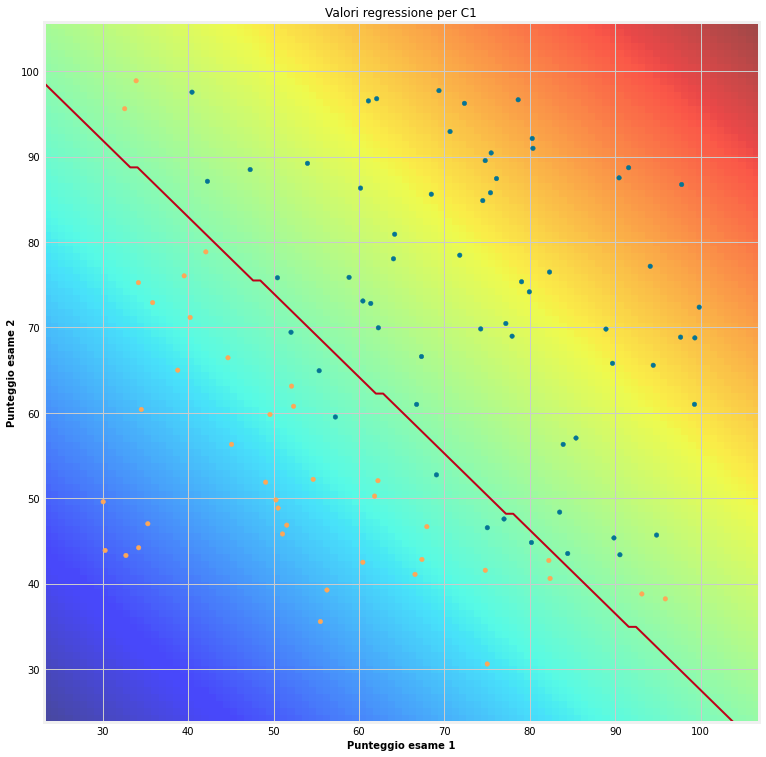

In [33]:
fig = plt.figure(figsize=(12,12))
fig.patch.set_facecolor('white')
ax = fig.gca()
imshow_handle = plt.imshow(y1, origin='lower', extent=(min1, max1, min2, max2), alpha=.7)
ax.scatter(np.asarray(X[:,1]), np.asarray(X[:,2]), s=20,c=c, marker='o', alpha=1)
plt.contour(u, v, z, [0.5], colors=[colors[9]])
plt.xlabel('Punteggio esame 1', fontsize=10)
plt.ylabel('Punteggio esame 2', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(u.min(), u.max())
plt.ylim(v.min(), v.max())
plt.title('Valori regressione per C1', fontsize=12)
plt.show()

In [42]:
statistics(Theta, Xm)

Veri negativi: 34
Falsi negativi: 5
Falsi positivi: 5
Veri positivi: 55
Precision insieme 1: 0.920
Recall insieme 1: 0.920
Precision insieme 2: 0.870
Recall insieme 2: 0.870
Accuracy: 0.900


array([[34.,  5.],
       [ 5., 55.]])